In [126]:
import pandas as pd
import numpy as np

In [127]:
df = pd.read_csv('./data/arch_benchmark/results.csv')
df

,Model,Parameters,GFLOPs,Preprocessing,Inference,Postprocessing
0,yolov8s,11137922,28.657715,0.004439,116.547427,2.491674
1,yolov8s-p2,10638536,36.969011,0.002759,155.700107,2.564013
2,yolov8s-p234,7410434,34.383258,0.002806,145.971780,3.026273
3,yolov8s-p2-c2fsum,9819336,34.662144,0.002789,151.259730,2.634735
4,yolov8s-p2-late_decoup,9493448,25.690470,0.002713,121.024005,2.503183
5,yolov8s-p2-late_decoupV2,9937096,30.888499,0.002725,136.821380,2.552991
6,yolov8s-p2-pconv_neck,8978024,32.095590,0.003099,142.617624,2.667820
7,yolov8s-p2-pconv_bone,8978024,32.095590,0.003009,145.268862,2.781038
8,yolov8s-p2-pconvema_bone,8979158,32.216320,0.002866,149.123111,2.807581
9,yolov8s-p2-pconvsimam_bone,8978024,32.095590,0.003362,156.578841,3.099036


In [128]:
# COMPUTE FPS/Latency
df['Latency'] = df['Preprocessing'] + df['Postprocessing'] + df['Inference']
df['FPS'] = 1000/df['Latency']
df.sort_values(by='FPS', ascending=False, inplace=True)
df

,Model,Parameters,GFLOPs,Preprocessing,Inference,Postprocessing,Latency,FPS
0,yolov8s,11137922,28.657715,0.004439,116.547427,2.491674,119.043541,8.400288
4,yolov8s-p2-late_decoup,9493448,25.690470,0.002713,121.024005,2.503183,123.529902,8.095206
5,yolov8s-p2-late_decoupV2,9937096,30.888499,0.002725,136.821380,2.552991,139.377096,7.174780
6,yolov8s-p2-pconv_neck,8978024,32.095590,0.003099,142.617624,2.667820,145.288544,6.882855
7,yolov8s-p2-pconv_bone,8978024,32.095590,0.003009,145.268862,2.781038,148.052909,6.754342
2,yolov8s-p234,7410434,34.383258,0.002806,145.971780,3.026273,149.000859,6.711371
8,yolov8s-p2-pconvema_bone,8979158,32.216320,0.002866,149.123111,2.807581,151.933558,6.581824
3,yolov8s-p2-c2fsum,9819336,34.662144,0.002789,151.259730,2.634735,153.897254,6.497842
1,yolov8s-p2,10638536,36.969011,0.002759,155.700107,2.564013,158.266878,6.318441
9,yolov8s-p2-pconvsimam_bone,8978024,32.095590,0.003362,156.578841,3.099036,159.681239,6.262476


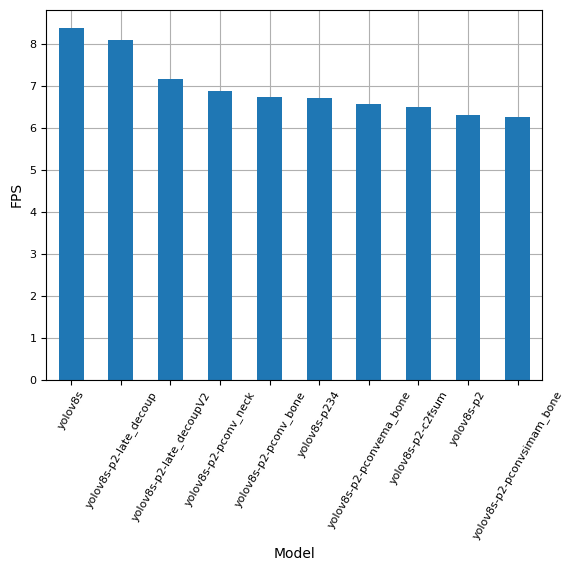

In [129]:
df.plot.bar(y='FPS', x='Model', rot=60, yticks=np.arange(0, np.ceil(df['FPS'].max()), 1), grid=True, zorder=2, legend=False, ylabel='FPS', fontsize=8)
None

In [130]:
df.sort_values(by='Inference', ascending=True, inplace=True)
df

,Model,Parameters,GFLOPs,Preprocessing,Inference,Postprocessing,Latency,FPS
0,yolov8s,11137922,28.657715,0.004439,116.547427,2.491674,119.043541,8.400288
4,yolov8s-p2-late_decoup,9493448,25.690470,0.002713,121.024005,2.503183,123.529902,8.095206
5,yolov8s-p2-late_decoupV2,9937096,30.888499,0.002725,136.821380,2.552991,139.377096,7.174780
6,yolov8s-p2-pconv_neck,8978024,32.095590,0.003099,142.617624,2.667820,145.288544,6.882855
7,yolov8s-p2-pconv_bone,8978024,32.095590,0.003009,145.268862,2.781038,148.052909,6.754342
2,yolov8s-p234,7410434,34.383258,0.002806,145.971780,3.026273,149.000859,6.711371
8,yolov8s-p2-pconvema_bone,8979158,32.216320,0.002866,149.123111,2.807581,151.933558,6.581824
3,yolov8s-p2-c2fsum,9819336,34.662144,0.002789,151.259730,2.634735,153.897254,6.497842
1,yolov8s-p2,10638536,36.969011,0.002759,155.700107,2.564013,158.266878,6.318441
9,yolov8s-p2-pconvsimam_bone,8978024,32.095590,0.003362,156.578841,3.099036,159.681239,6.262476


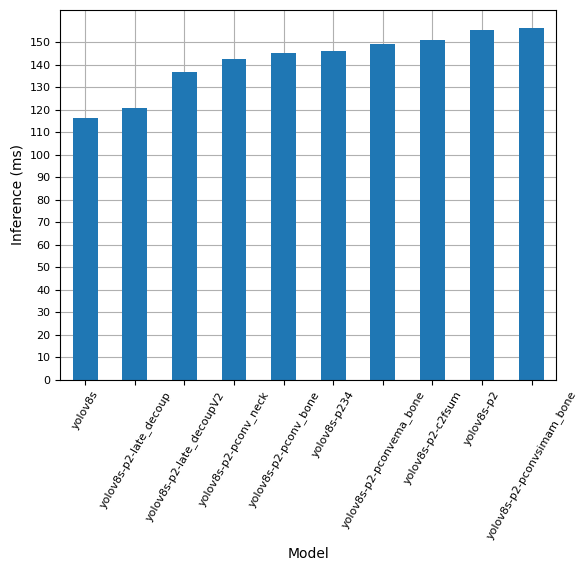

In [131]:
df.plot.bar(y='Inference', x='Model', rot=60, yticks=np.arange(0, np.ceil(df['Inference'].max()), 10), grid=True, zorder=2, legend=False, ylabel='Inference (ms)', fontsize=8)
None